# Indice ATMO du jour par Commune

source des données: opendata d'air pays de la loire

In [1]:
# importer des librairies
import requests
from datetime import date, datetime
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as cx
import locale

In [2]:
# Pour mettre la date en français
locale.setlocale(locale.LC_ALL, 'fr_FR.UTF-8')

'fr_FR.UTF-8'

In [3]:
# Récupération de la date du jour
day = date.today()
day

datetime.date(2021, 3, 9)

In [4]:
url_legende = 'https://data.airpl.org/api/v1/indice/qualificatif/'
r = requests.get(url_legende)
legendes = r.json()
legendes

[{'valeur': 1, 'qualificatif': 'bon', 'couleur': '#50f0e6'},
 {'valeur': 2, 'qualificatif': 'moyen', 'couleur': '#50ccaa'},
 {'valeur': 3, 'qualificatif': 'degradé', 'couleur': '#f0e641'},
 {'valeur': 4, 'qualificatif': 'mauvais', 'couleur': '#ff5050'},
 {'valeur': 5, 'qualificatif': 'très mauvais', 'couleur': '#960032'},
 {'valeur': 6, 'qualificatif': 'extrêmement mauvais', 'couleur': '#7d2181'},
 {'valeur': 100, 'qualificatif': 'indisponible', 'couleur': '#DDDDDD'},
 {'valeur': 101, 'qualificatif': 'événement', 'couleur': '#888888'}]

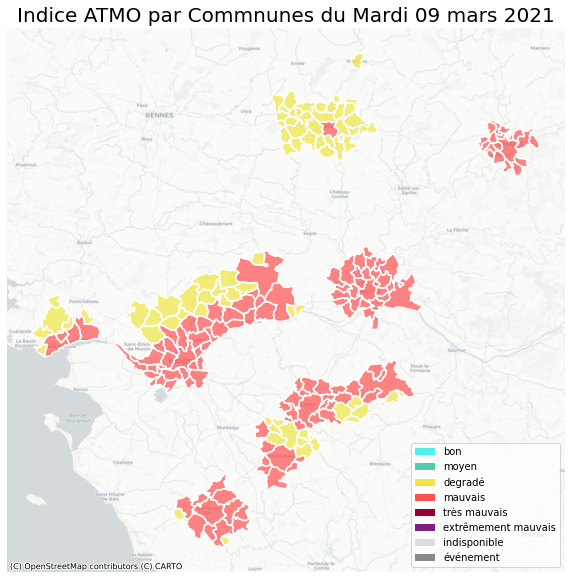

In [5]:
from matplotlib.patches import Patch
# Récupération des données sur l'opendata d'airpl
url_data = f'https://data.airpl.org/api/v1/indice/commune/?export=json&date={day.isoformat()}&limit=1500'
# Création d'un dataframe avec les données
r = requests.get(url_data)
data_c = pd.DataFrame(r.json().get('results')).set_index('commune')
url_commune = 'https://data.airpl.org/api/v1/indice/commune-geojson/'
com = gpd.read_file(url_commune).set_index('id')
data2 = com.join(data_c, how='inner', lsuffix="_geo").set_index('id')
# Création de la carte
# from matplotlib.patches import Patch
# Création de la carte
fig, ax = plt.subplots(figsize=(20,10))
data2.to_crs('EPSG:3857').boundary.plot(ax=ax, color='white')
data2.to_crs('EPSG:3857').plot(ax=ax, color=data2.couleur, alpha=0.7, legend=True)
cx.add_basemap(ax=ax, crs='EPSG:3857', source=cx.providers.CartoDB.Positron)
ax.set_title(f"Indice ATMO par Commnunes du {datetime.strftime(day, '%A %d %B %Y')}", fontsize=20)
ax.set_axis_off()
lgd = ax.legend(
    handles=[
        Patch(
            facecolor=e.get('couleur'),
            edgecolor=None,
            label=e.get('qualificatif')
        ) for e in legendes], loc="lower right")
plt.show()